In [30]:
raw_data <- read.csv("SSL_FIRST_1000_RACE_CODE_LESS_THAN_20.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 817

In [31]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [32]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 817

In [33]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
500,1,less than 20,1,2,2,1,7,0.2,1,0
500,1,less than 20,1,2,6,0,0,0.0,0,0
500,1,less than 20,1,1,4,1,1,-0.3,2,0
500,1,less than 20,1,2,6,1,0,-0.4,1,0
500,1,less than 20,1,1,8,1,0,-0.7,3,0
500,1,less than 20,1,2,4,0,2,-0.2,1,0


In [34]:
library(MatchIt)
library(dplyr)
library(ggplot2)

In [35]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,808,463.8998,0.7588159
1,9,474.8889,8.8450307


In [36]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE_RANK = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE_RANK,STD_ERROR
0,808,529.7240,11.67184
1,9,377.1111,122.03716


In [37]:
# T-test without PSM for SSL_SCORE and RACE_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~RACE_CODE_CD)

The following objects are masked from complete_data (pos = 3):

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from matched:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from complete_data (pos = 5):

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GA


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = -1.2379, df = 8.1182, p-value = 0.2504
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -31.408974   9.430701
sample estimates:
mean in group 0 mean in group 1 
       463.8998        474.8889 


In [38]:
# T-test without PSM for SSL_SCORE_RANK and RACE_CODE_CD
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = 1.2449, df = 8.147, p-value = 0.2478
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -129.2039  434.4297
sample estimates:
mean in group 0 mean in group 1 
       529.7240        377.1111 


In [39]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [40]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All           808       9
Matched         9       9
Unmatched     799       0
Discarded       0       0


In [41]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

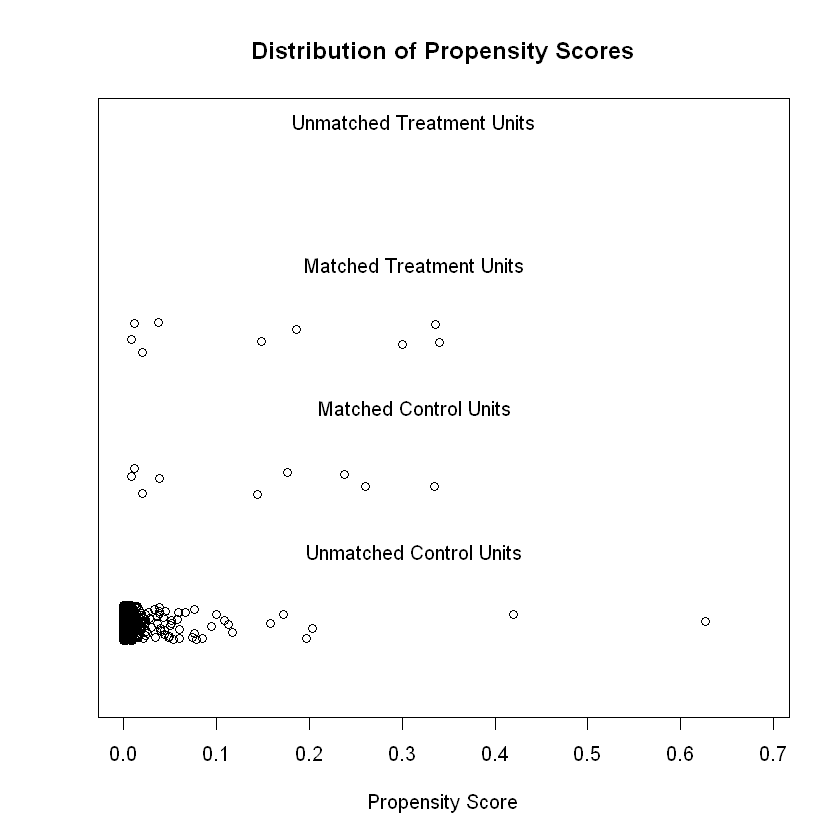

In [42]:
plot(mod_match, type = "jitter")

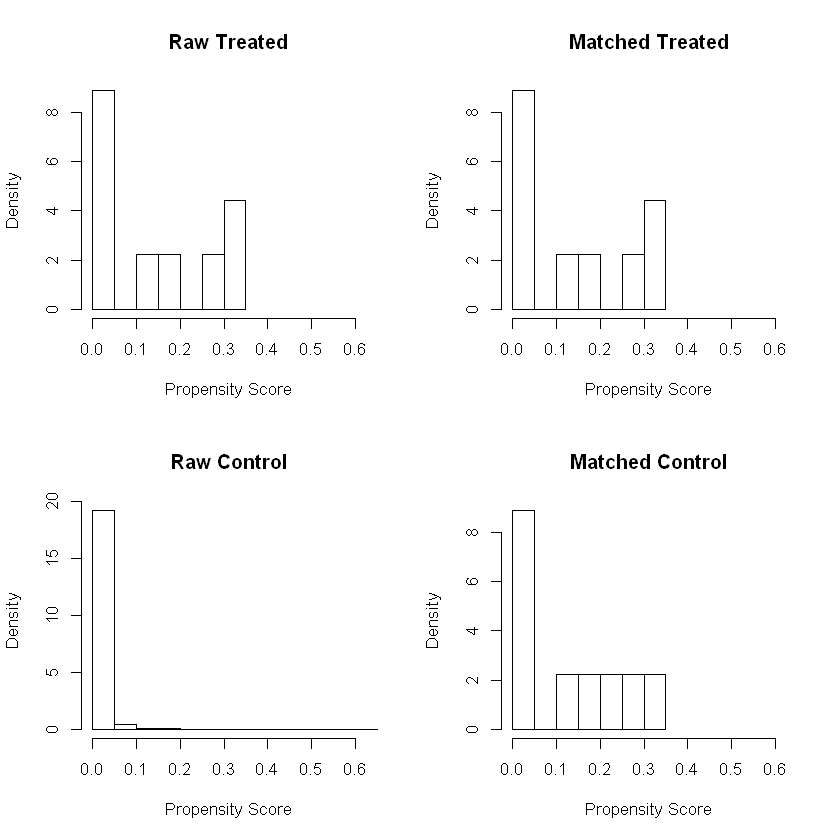

In [43]:
plot(mod_match, type = "hist")

In [44]:
head(matched)

,SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
18,500,1,less than 20,0,1,12,1,0,0.4,1,1,0.29985516,1
54,500,1,less than 20,0,2,6,1,1,1.2,1,0,0.26018322,1
106,500,1,less than 20,0,2,3,1,0,2.7,1,1,0.18573169,1
115,500,1,less than 20,1,2,1,1,3,1.0,0,1,0.02014536,1
116,499,154,less than 20,1,4,1,1,2,-0.9,0,1,0.34026411,1
186,485,236,less than 20,1,3,1,1,0,0.6,0,1,0.14773862,1


In [45]:
# Doing T - test on matched records
options(warn=-1)
attach(matched)

The following objects are masked from complete_data (pos = 3):

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from complete_data (pos = 4):

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK

The following objects are masked from matched (pos = 5):

    distance, PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,


In [46]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)

In [47]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = -0.56822, df = 15.284, p-value = 0.5781
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -30.57894  17.69006
sample estimates:
mean in group 0 mean in group 1 
       468.4444        474.8889 


In [48]:
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = 0.506, df = 15.91, p-value = 0.6198
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -268.7912  437.2357
sample estimates:
mean in group 0 mean in group 1 
       461.3333        377.1111 
